# Cleaning and Preprocessing

In [38]:
##This notebook examines mortality patterns in Tennessee counties from 2019 to 2021 to
##identify factors influencing variations in mortality rates through different predictive models such as:
##KNN, linear regression, logistic regression, decision tree, etc. Although this isn't extensive and the models
##aren't the best, we look forward to changing our target variables while training the data to different
##correlations to life expectancy and rerunning the models.

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, classification_report, mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_classification

In [40]:
pip install PyDrive

In [41]:
github_url = 'https://raw.githubusercontent.com/marymorkos/tnhealth/main/2019healthrankingstn.csv'
tnhealth2019 = pd.read_csv(github_url)

In [42]:
github_url = 'https://raw.githubusercontent.com/marymorkos/tnhealth/main/2020healthrankingstn.csv'
tnhealth2020 = pd.read_csv(github_url)

In [43]:
github_url = 'https://raw.githubusercontent.com/marymorkos/tnhealth/main/2021healthrankingstn.csv'
tnhealth2021 = pd.read_csv(github_url)

In [44]:
import os

In [45]:
tnhealth2019= tnhealth2019.rename(columns={'Longtitude': 'Longitude'})
tnhealth2020= tnhealth2020.rename(columns={'Longtitude': 'Longitude'})
tnhealth2021= tnhealth2021.rename(columns={'Longtitude': 'Longitude'})

In [46]:
tnhealth2019.head()

,FIPS,State,County,Years of Potential Life Lost Rate: Premature death,95% CI - Low: Premature death,95% CI - High: Premature death,Z-Score: Premature death,YPLL Rate (Black),YPLL Rate (Hispanic),YPLL Rate (White),...,# Not Proficient in English,% Not Proficient in English,95% CI - Low: Demographics,95% CI - High: Demographics,% Female,# Rural,% Rural,Latitude,Longitude,Year
0,47001,Tennessee,Anderson,9536,8703,10368,-0.40,11586.0,NaN,9749.0,...,734,1,1,1,51.3,26041,34.7,36.1185,-84.1985,2019
1,47003,Tennessee,Bedford,9762,8769,10754,-0.28,9265.0,4454.0,10683.0,...,1463,3,2,4,50.9,25053,55.6,35.5138,-86.4589,2019
2,47005,Tennessee,Benton,12828,10692,14965,1.40,NaN,NaN,NaN,...,36,0,0,1,50.9,12937,78.5,36.0698,-88.0683,2019
3,47007,Tennessee,Bledsoe,7735,6103,9367,-1.39,NaN,NaN,NaN,...,260,2,0,4,41.2,12876,100.0,35.5964,-85.2051,2019
4,47009,Tennessee,Blount,8268,7676,8860,-1.09,8794.0,NaN,8458.0,...,1042,1,1,1,51.5,40140,32.6,35.6872,-83.9255,2019


In [47]:
tnhealth2020.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate: Premature death,95% CI - Low: Premature death,95% CI - High: Premature death,Z-Score: Premature death,YPLL Rate (AIAN): Premature death,YPLL Rate (AIAN) 95% CI - Low: Premature death,...,# Not Proficient in English,% Not Proficient in English,95% CI - Low: Demographics,95% CI - High: Demographics,% Female,# Rural,% Rural,Latitude,Longitude,Year
0,47001,Tennessee,Anderson,1369,10009,9172,10846,-0.19,NaN,NaN,...,619,1,0.0,1.0,51.3,26041,34.7,36.1185,-84.1985,2020
1,47003,Tennessee,Bedford,859,10294,9268,11319,-0.03,NaN,NaN,...,1474,3,2.0,4.0,50.9,25053,55.6,35.5138,-86.4589,2020
2,47005,Tennessee,Benton,428,14479,12233,16726,2.33,NaN,NaN,...,25,0,0.0,1.0,51.0,12937,78.5,36.0698,-88.0683,2020
3,47007,Tennessee,Bledsoe,229,8126,6427,9824,-1.25,NaN,NaN,...,245,2,0.0,3.0,41.1,12876,100.0,35.5964,-85.2051,2020
4,47009,Tennessee,Blount,2049,8842,8235,9448,-0.85,NaN,NaN,...,760,1,0.0,1.0,51.5,40140,32.6,35.6872,-83.9255,2020


In [48]:
tnhealth2021.head()

,FIPS,State,County,Unreliable,Deaths: Premature death,Years of Potential Life Lost Rate,95% CI - Low: Premature death,95% CI - High: Premature death,Z-Score: Premature death,YPLL Rate (AIAN),...,# Not Proficient in English,% Not Proficient in English,95% CI - Low,95% CI - High,% Female,# Rural,% Rural,Latitude,Longitude,Year
0,47001,Tennessee,Anderson,NaN,1447,10513,9662,11364,0.11,NaN,...,560,1,0.0,1.0,51.3,26041,34.7,36.1185,-84.1985,2021
1,47003,Tennessee,Bedford,NaN,833,9846,8867,10826,-0.28,NaN,...,1433,3,2.0,4.0,50.7,25053,55.6,35.5138,-86.4589,2021
2,47005,Tennessee,Benton,NaN,410,14216,11974,16458,2.24,NaN,...,19,0,0.0,1.0,51.1,12937,78.5,36.0698,-88.0683,2021
3,47007,Tennessee,Bledsoe,NaN,248,7894,6366,9422,-1.40,NaN,...,220,2,0.0,3.0,40.5,12876,100.0,35.5964,-85.2051,2021
4,47009,Tennessee,Blount,NaN,2110,8763,8164,9362,-0.90,NaN,...,773,1,0.0,1.0,51.4,40140,32.6,35.6872,-83.9255,2021


In [49]:
dfs = {'2019': tnhealth2019, '2020': tnhealth2020, '2021': tnhealth2021}

In [50]:
def find_uncommon_columns(df1, df2):
    return list(set(df1.columns) - set(df2.columns))

In [51]:
uncommon_columns = []

In [52]:
for year1, df1 in dfs.items():
    for year2, df2 in dfs.items():
        if year1 != year2:
            comparison_name = f"{year1} vs {year2}"
            uncommon_columns.append({comparison_name: find_uncommon_columns(df1, df2)})

In [53]:
for comparison in uncommon_columns:
    print("Uncommon columns in", list(comparison.keys())[0], ":", comparison[list(comparison.keys())[0]])

Uncommon columns in 2019 vs 2020 : ['# African American', 'Z-Score: Dentists', 'PCP Ratio', 'Mentally Unhealthy Days', '# Asian.1', '% African American', '% Diabetic', 'Household income (Hispanic)', 'Household income (White)', '% Limited Access', 'MHP Ratio', 'Preventable Hosp. Rate', '% < 18', '# American Indian/Alaskan Native', '% Alcohol-Impaired', '95% CI - Low: Poor physical health days', 'MV Mortality Rate', '% Fair/Poor', 'MHP Rate', '# American Indian/Alaskan Native.1', '% Obese', '% LBW', 'YPLL Rate (Black)', 'YPLL Rate (Hispanic)', 'Presence of violation', 'Household income (Black)', '% Free or Reduced Lunch', '95% CI - Low', '95% CI - High', 'Z-Score: Poor physical health days', '% American Indian/Alaskan Native', '% 65 and over.1', 'Other PCP Ratio', 'Physically Unhealthy Days', 'Association Rate', 'Other PCP Rate', 'Age-Adjusted Mortality', '% American Indian/Alaskan Native.1', 'Graduation Rate', '% Screened', 'YPLL Rate (White)', '% Drive Alone', '# Households: Children i

In [54]:
common_columns = set.intersection(*[set(df.columns) for df in dfs.values()])

In [55]:
columns_to_preserve = ['FIPS', 'State', 'County', 'Longitude', 'Latitude']

In [56]:
columns_to_drop = []

In [57]:
for year, df in dfs.items():
    cols_to_drop = [col for col in df.columns if col not in common_columns and col not in columns_to_preserve]
    columns_to_drop.append({year: cols_to_drop})

In [58]:
for year, df in dfs.items():
    df.drop(columns=[col for col in columns_to_drop if list(col.keys())[0] == year][0][year], inplace=True, errors='ignore')

In [59]:
for year, df in dfs.items():
    print(f"DataFrame for {year} after dropping uncommon columns:")
    print(df.head())

DataFrame for 2019 after dropping uncommon columns:
    FIPS      State    County  95% CI - Low: Premature death  \
0  47001  Tennessee  Anderson                           8703   
1  47003  Tennessee   Bedford                           8769   
2  47005  Tennessee    Benton                          10692   
3  47007  Tennessee   Bledsoe                           6103   
4  47009  Tennessee    Blount                           7676   

   95% CI - High: Premature death  Z-Score: Premature death  \
0                           10368                     -0.40   
1                           10754                     -0.28   
2                           14965                      1.40   
3                            9367                     -1.39   
4                            8860                     -1.09   

   95% CI - Low: Poor or fair health  95% CI - High: Poor or fair health  \
0                                 18                                  20   
1                               

In [60]:
tnhealth2019.head()

,FIPS,State,County,95% CI - Low: Premature death,95% CI - High: Premature death,Z-Score: Premature death,95% CI - Low: Poor or fair health,95% CI - High: Poor or fair health,Z-Score: Poor or fair health,95% CI - Low: Poor mental health days,...,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,% Female,# Rural,% Rural,Latitude,Longitude,Year
0,47001,Tennessee,Anderson,8703,10368,-0.40,18,20,-0.51,4.5,...,68059,89.2,734,1,51.3,26041,34.7,36.1185,-84.1985,2019
1,47003,Tennessee,Bedford,8769,10754,-0.28,21,22,0.45,4.5,...,37170,77.2,1463,3,50.9,25053,55.6,35.5138,-86.4589,2019
2,47005,Tennessee,Benton,10692,14965,1.40,20,22,0.32,4.9,...,14851,92.9,36,0,50.9,12937,78.5,36.0698,-88.0683,2019
3,47007,Tennessee,Bledsoe,6103,9367,-1.39,21,23,0.64,4.5,...,13058,88.7,260,2,41.2,12876,100.0,35.5964,-85.2051,2019
4,47009,Tennessee,Blount,7676,8860,-1.09,16,17,-1.44,4.3,...,118326,91.1,1042,1,51.5,40140,32.6,35.6872,-83.9255,2019


In [61]:
tnhealth2020.head()

,FIPS,State,County,95% CI - Low: Premature death,95% CI - High: Premature death,Z-Score: Premature death,95% CI - Low: Poor or fair health,95% CI - High: Poor or fair health,Z-Score: Poor or fair health,95% CI - Low: Poor mental health days,...,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,% Female,# Rural,% Rural,Latitude,Longitude,Year
0,47001,Tennessee,Anderson,9172,10846,-0.19,18,20,-0.88,4.5,...,68116,89.1,619,1,51.3,26041,34.7,36.1185,-84.1985,2020
1,47003,Tennessee,Bedford,9268,11319,-0.03,21,23,0.23,4.6,...,37556,76.6,1474,3,50.9,25053,55.6,35.5138,-86.4589,2020
2,47005,Tennessee,Benton,12233,16726,2.33,22,24,0.74,4.8,...,14970,92.5,25,0,51.0,12937,78.5,36.0698,-88.0683,2020
3,47007,Tennessee,Bledsoe,6427,9824,-1.25,22,23,0.46,4.5,...,13038,88.4,245,2,41.1,12876,100.0,35.5964,-85.2051,2020
4,47009,Tennessee,Blount,8235,9448,-0.85,19,21,-0.60,4.3,...,119321,90.8,760,1,51.5,40140,32.6,35.6872,-83.9255,2020


In [62]:
tnhealth2021.head()

,FIPS,State,County,Unreliable,95% CI - Low: Premature death,95% CI - High: Premature death,Z-Score: Premature death,95% CI - Low: Poor or fair health,95% CI - High: Poor or fair health,Z-Score: Poor or fair health,...,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,% Female,# Rural,% Rural,Latitude,Longitude,Year
0,47001,Tennessee,Anderson,NaN,9662,11364,0.11,18,24,-1.00,...,68400,88.9,560,1,51.3,26041,34.7,36.1185,-84.1985,2021
1,47003,Tennessee,Bedford,NaN,8867,10826,-0.28,22,27,0.18,...,37842,76.1,1433,3,50.7,25053,55.6,35.5138,-86.4589,2021
2,47005,Tennessee,Benton,NaN,11974,16458,2.24,24,31,1.05,...,14910,92.3,19,0,51.1,12937,78.5,36.0698,-88.0683,2021
3,47007,Tennessee,Bledsoe,NaN,6366,9422,-1.40,23,30,0.81,...,13151,87.3,220,2,40.5,12876,100.0,35.5964,-85.2051,2021
4,47009,Tennessee,Blount,NaN,8164,9362,-0.90,17,23,-1.46,...,120594,90.6,773,1,51.4,40140,32.6,35.6872,-83.9255,2021


In [63]:
for df in [tnhealth2019, tnhealth2020, tnhealth2021]:
    columns_to_drop = [col for col in df.columns if "95% CI" in col or "Z-Score" in col]
    df.drop(columns=columns_to_drop, inplace=True)

In [64]:
print("DataFrame tnhealth2019 after dropping columns containing '95% CI' or 'Z-Score':")
print(tnhealth2019.head())

DataFrame tnhealth2019 after dropping columns containing '95% CI' or 'Z-Score':
    FIPS      State    County  Unreliable  % LBW (Black)  % LBW (Hispanic)  \
0  47001  Tennessee  Anderson         NaN           12.0               NaN   
1  47003  Tennessee   Bedford         NaN           14.0               6.0   
2  47005  Tennessee    Benton         NaN            NaN               NaN   
3  47007  Tennessee   Bledsoe         NaN            NaN               NaN   
4  47009  Tennessee    Blount         NaN           11.0               4.0   

   % LBW (White)  % Smokers  Food Environment Index  % Physically Inactive  \
0            9.0         21                     7.5                     28   
1            9.0         21                     7.9                     33   
2            NaN         23                     7.4                     32   
3            NaN         26                     7.8                     29   
4            8.0         19                     7.7          

In [65]:
print("\nDataFrame tnhealth2020 after dropping columns containing '95% CI' or 'Z-Score':")
print(tnhealth2020.head())


DataFrame tnhealth2020 after dropping columns containing '95% CI' or 'Z-Score':
    FIPS      State    County  Unreliable  % LBW (Black)  % LBW (Hispanic)  \
0  47001  Tennessee  Anderson         NaN           11.0               NaN   
1  47003  Tennessee   Bedford         NaN           14.0               6.0   
2  47005  Tennessee    Benton         NaN            NaN               NaN   
3  47007  Tennessee   Bledsoe         NaN            NaN               NaN   
4  47009  Tennessee    Blount         NaN           11.0               5.0   

   % LBW (White)  % Smokers  Food Environment Index  % Physically Inactive  \
0            9.0         21                     7.5                     26   
1            9.0         23                     7.9                     32   
2            NaN         24                     7.4                     29   
3            NaN         25                     7.9                     26   
4            8.0         21                     7.7         

In [66]:
print("\nDataFrame tnhealth2021 after dropping columns containing '95% CI' or 'Z-Score':")
print(tnhealth2021.head())


DataFrame tnhealth2021 after dropping columns containing '95% CI' or 'Z-Score':
    FIPS      State    County  Unreliable  % LBW (Black)  % LBW (Hispanic)  \
0  47001  Tennessee  Anderson         NaN           12.0               5.0   
1  47003  Tennessee   Bedford         NaN           14.0               6.0   
2  47005  Tennessee    Benton         NaN            NaN               NaN   
3  47007  Tennessee   Bledsoe         NaN            NaN               NaN   
4  47009  Tennessee    Blount         NaN           13.0               6.0   

   % LBW (White)  % Smokers  Food Environment Index  % Physically Inactive  \
0            9.0         24                     7.2                     28   
1            9.0         26                     7.7                     32   
2            NaN         30                     6.8                     26   
3            NaN         28                     7.2                     31   
4            8.0         22                     7.6         

In [67]:
for df in [tnhealth2019, tnhealth2020, tnhealth2021]:
    column_means = df.select_dtypes(include=[np.number]).mean()
    df.fillna(column_means, inplace=True)

In [68]:
print(tnhealth2019.head())

    FIPS      State    County  Unreliable  % LBW (Black)  % LBW (Hispanic)  \
0  47001  Tennessee  Anderson         NaN      12.000000          7.675676   
1  47003  Tennessee   Bedford         NaN      14.000000          6.000000   
2  47005  Tennessee    Benton         NaN      14.391304          7.675676   
3  47007  Tennessee   Bledsoe         NaN      14.391304          7.675676   
4  47009  Tennessee    Blount         NaN      11.000000          4.000000   

   % LBW (White)  % Smokers  Food Environment Index  % Physically Inactive  \
0       9.000000         21                     7.5                     28   
1       9.000000         21                     7.9                     33   
2       8.056604         23                     7.4                     32   
3       8.056604         26                     7.8                     29   
4       8.000000         19                     7.7                     26   

   ...  # Non-Hispanic White  % Non-Hispanic White  \
0  ...  

In [69]:
print(tnhealth2020.head())

    FIPS      State    County  Unreliable  % LBW (Black)  % LBW (Hispanic)  \
0  47001  Tennessee  Anderson         NaN      11.000000           7.74359   
1  47003  Tennessee   Bedford         NaN      14.000000           6.00000   
2  47005  Tennessee    Benton         NaN      14.458333           7.74359   
3  47007  Tennessee   Bledsoe         NaN      14.458333           7.74359   
4  47009  Tennessee    Blount         NaN      11.000000           5.00000   

   % LBW (White)  % Smokers  Food Environment Index  % Physically Inactive  \
0       9.000000         21                     7.5                     26   
1       9.000000         23                     7.9                     32   
2       8.107143         24                     7.4                     29   
3       8.107143         25                     7.9                     26   
4       8.000000         21                     7.7                     25   

   ...  # Non-Hispanic White  % Non-Hispanic White  \
0  ...  

In [70]:
print(tnhealth2021.head())

    FIPS      State    County  Unreliable  % LBW (Black)  % LBW (Hispanic)  \
0  47001  Tennessee  Anderson         NaN      12.000000          5.000000   
1  47003  Tennessee   Bedford         NaN      14.000000          6.000000   
2  47005  Tennessee    Benton         NaN      14.553191          7.785714   
3  47007  Tennessee   Bledsoe         NaN      14.553191          7.785714   
4  47009  Tennessee    Blount         NaN      13.000000          6.000000   

   % LBW (White)  % Smokers  Food Environment Index  % Physically Inactive  \
0       9.000000         24                     7.2                     28   
1       9.000000         26                     7.7                     32   
2       7.964286         30                     6.8                     26   
3       7.964286         28                     7.2                     31   
4       8.000000         22                     7.6                     25   

   ...  # Non-Hispanic White  % Non-Hispanic White  \
0  ...  

In [71]:
concatenated_df = pd.concat([tnhealth2019, tnhealth2020, tnhealth2021], ignore_index=True)

In [72]:
concatenated_df.head()

,FIPS,State,County,Unreliable,% LBW (Black),% LBW (Hispanic),% LBW (White),% Smokers,Food Environment Index,% Physically Inactive,...,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,% Female,# Rural,% Rural,Latitude,Longitude,Year
0,47001,Tennessee,Anderson,NaN,12.000000,7.675676,9.000000,21,7.5,28,...,68059,89.2,734,1,51.3,26041,34.7,36.1185,-84.1985,2019
1,47003,Tennessee,Bedford,NaN,14.000000,6.000000,9.000000,21,7.9,33,...,37170,77.2,1463,3,50.9,25053,55.6,35.5138,-86.4589,2019
2,47005,Tennessee,Benton,NaN,14.391304,7.675676,8.056604,23,7.4,32,...,14851,92.9,36,0,50.9,12937,78.5,36.0698,-88.0683,2019
3,47007,Tennessee,Bledsoe,NaN,14.391304,7.675676,8.056604,26,7.8,29,...,13058,88.7,260,2,41.2,12876,100.0,35.5964,-85.2051,2019
4,47009,Tennessee,Blount,NaN,11.000000,4.000000,8.000000,19,7.7,26,...,118326,91.1,1042,1,51.5,40140,32.6,35.6872,-83.9255,2019


In [73]:
concatenated_df.tail()

,FIPS,State,County,Unreliable,% LBW (Black),% LBW (Hispanic),% LBW (White),% Smokers,Food Environment Index,% Physically Inactive,...,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,% Female,# Rural,% Rural,Latitude,Longitude,Year
280,47181,Tennessee,Wayne,NaN,14.553191,7.785714,7.964286,29,7.0,40,...,14918,89.5,39,0,44.6,17021,100.0,35.2399,-87.7881,2021
281,47183,Tennessee,Weakley,NaN,13.000000,7.785714,6.000000,26,7.3,33,...,28827,86.5,139,0,51.2,23466,67.0,36.2983,-88.7178,2021
282,47185,Tennessee,White,NaN,14.553191,7.785714,7.964286,28,7.6,24,...,25463,93.1,22,0,51.0,20201,78.2,35.9264,-85.4552,2021
283,47187,Tennessee,Williamson,NaN,11.000000,8.000000,6.000000,14,9.4,18,...,199739,83.8,1707,1,50.9,35512,19.4,35.8938,-86.8986,2021
284,47189,Tennessee,Wilson,NaN,17.000000,7.000000,8.000000,20,8.7,22,...,121712,84.1,1505,1,50.8,43850,38.5,36.1547,-86.2973,2021


# More Cleaning

In [74]:
categorical_columns = ['FIPS', 'State', 'County', 'Longitude', 'Latitude', 'Year']

In [75]:
concatenated_df.drop(columns=categorical_columns, inplace=True)

In [76]:
print("Concatenated DataFrame after dropping categorical columns:")
print(concatenated_df.head())

Concatenated DataFrame after dropping categorical columns:
   Unreliable  % LBW (Black)  % LBW (Hispanic)  % LBW (White)  % Smokers  \
0         NaN      12.000000          7.675676       9.000000         21   
1         NaN      14.000000          6.000000       9.000000         21   
2         NaN      14.391304          7.675676       8.056604         23   
3         NaN      14.391304          7.675676       8.056604         26   
4         NaN      11.000000          4.000000       8.000000         19   

   Food Environment Index  % Physically Inactive  % Excessive Drinking  \
0                     7.5                     28                    14   
1                     7.9                     33                    15   
2                     7.4                     32                    12   
3                     7.8                     29                    14   
4                     7.7                     26                    14   

   # Alcohol-Impaired Driving Deaths  #

In [77]:
concatenated_df.dropna(axis=1, inplace=True)

print("Concatenated DataFrame after dropping columns with NaN values:")
print(concatenated_df.head())

Concatenated DataFrame after dropping columns with NaN values:
   % LBW (Black)  % LBW (Hispanic)  % LBW (White)  % Smokers  \
0      12.000000          7.675676       9.000000         21   
1      14.000000          6.000000       9.000000         21   
2      14.391304          7.675676       8.056604         23   
3      14.391304          7.675676       8.056604         26   
4      11.000000          4.000000       8.000000         19   

   Food Environment Index  % Physically Inactive  % Excessive Drinking  \
0                     7.5                     28                    14   
1                     7.9                     33                    15   
2                     7.4                     32                    12   
3                     7.8                     29                    14   
4                     7.7                     26                    14   

   # Alcohol-Impaired Driving Deaths  # Driving Deaths  # Chlamydia Cases  \
0                             

In [78]:
concatenated_df.head()

,% LBW (Black),% LBW (Hispanic),% LBW (White),% Smokers,Food Environment Index,% Physically Inactive,% Excessive Drinking,# Alcohol-Impaired Driving Deaths,# Driving Deaths,# Chlamydia Cases,...,% Native Hawaiian/Other Pacific Islander,# Hispanic,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,% Female,# Rural,% Rural
0,12.000000,7.675676,9.000000,21,7.5,28,14,18,60,263.0,...,0.1,2188,2.9,68059,89.2,734,1,51.3,26041,34.7
1,14.000000,6.000000,9.000000,21,7.9,33,15,24,47,153.0,...,0.2,5822,12.1,37170,77.2,1463,3,50.9,25053,55.6
2,14.391304,7.675676,8.056604,23,7.4,32,12,11,27,56.0,...,0.0,375,2.3,14851,92.9,36,0,50.9,12937,78.5
3,14.391304,7.675676,8.056604,26,7.8,29,14,4,8,180.0,...,0.0,339,2.3,13058,88.7,260,2,41.2,12876,100.0
4,11.000000,4.000000,8.000000,19,7.7,26,14,34,109,473.0,...,0.1,4285,3.3,118326,91.1,1042,1,51.5,40140,32.6


In [79]:
columns_with_tennessee = concatenated_df.columns[concatenated_df.eq('Tennessee').any()]

In [80]:
print("Columns containing 'Tennessee':")
for column in columns_with_tennessee:
    print(column)

Columns containing 'Tennessee':


In [81]:
for column in concatenated_df.columns:
    print("Unique values in column '{}':".format(column))
    print(concatenated_df[column].unique())
    print()

Unique values in column '% LBW (Black)':
[12.         14.         14.39130435 11.         10.         13.
 20.         15.         19.         17.         16.         18.
 27.          8.         22.         23.          9.         14.45833333
 14.55319149]

Unique values in column '% LBW (Hispanic)':
[ 7.67567568  6.          4.          7.         12.         13.
  8.          9.         10.          5.          7.74358974 11.
  7.78571429]

Unique values in column '% LBW (White)':
[ 9.          8.05660377  8.          7.          6.         10.
  8.10714286  7.96428571]

Unique values in column '% Smokers':
[21 23 26 19 20 25 24 22 27 18 15 28 30 29 31 14]

Unique values in column 'Food Environment Index':
[7.5        7.9        7.4        7.8        7.7        7.3
 7.         8.4        7.6        6.1        8.8        7.1
 6.7        8.2        7.2        8.1        6.6        8.
 6.9        5.3        8.3        6.3        6.5        8.5
 5.9        7.65       9.2        8.6     

In [82]:
concatenateddf_numeric = concatenated_df.select_dtypes(include=['number'])

print(concatenateddf_numeric)

     % LBW (Black)  % LBW (Hispanic)  % LBW (White)  % Smokers  \
0        12.000000          7.675676       9.000000         21   
1        14.000000          6.000000       9.000000         21   
2        14.391304          7.675676       8.056604         23   
3        14.391304          7.675676       8.056604         26   
4        11.000000          4.000000       8.000000         19   
..             ...               ...            ...        ...   
280      14.553191          7.785714       7.964286         29   
281      13.000000          7.785714       6.000000         26   
282      14.553191          7.785714       7.964286         28   
283      11.000000          8.000000       6.000000         14   
284      17.000000          7.000000       8.000000         20   

     Food Environment Index  % Physically Inactive  % Excessive Drinking  \
0                       7.5                     28                    14   
1                       7.9                     33     

# Model Training

In [83]:
X = concatenateddf_numeric.drop(columns=['Life Expectancy'])
y = concatenateddf_numeric['Life Expectancy']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Model

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
model = LinearRegression()

In [88]:
model.fit(X_train, y_train)

LinearRegression()

In [89]:
predictions = model.predict(X_test)

In [90]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.9537812205407389


In [91]:
import matplotlib.pyplot as plt

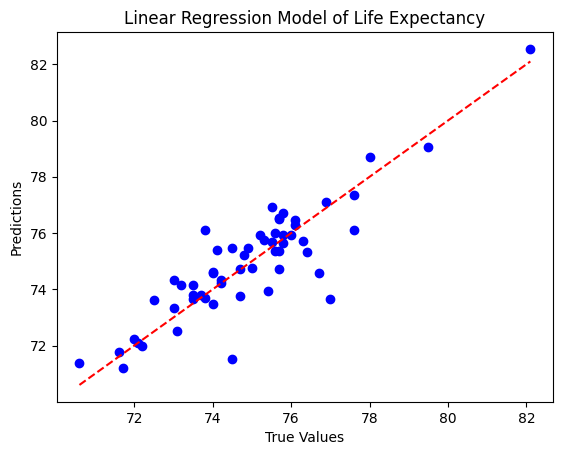

In [92]:
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Linear Regression Model of Life Expectancy')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Nonlinear Model - Polynomial

In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [94]:
degree = 2

In [95]:
polynomial_features = PolynomialFeatures(degree=degree)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

In [96]:
model = LinearRegression()

In [97]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [98]:
predictions = model.predict(X_test_poly)

In [99]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 12191.184556439284


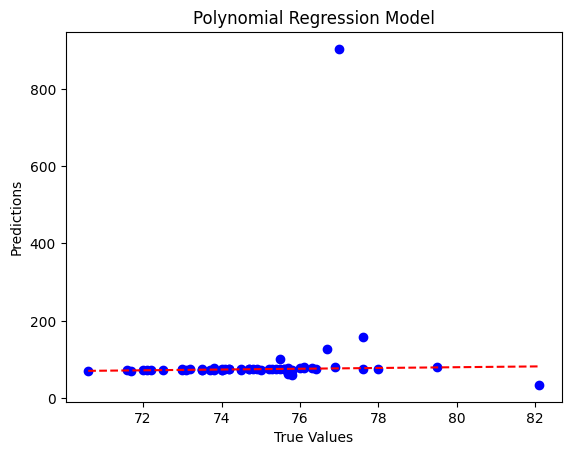

In [100]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Polynomial Regression Model')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Decision Tree (numerical)

In [101]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [102]:
model = DecisionTreeRegressor()

In [103]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [104]:
predictions = model.predict(X_test)

In [105]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.8947368421052648


# Nonlinear Model: Gaussian Processes



In [106]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error

In [107]:
kernel = RBF()

In [108]:
model = GaussianProcessRegressor(kernel=kernel)

In [109]:
model.fit(X_train, y_train)

GaussianProcessRegressor(kernel=RBF(length_scale=1))

In [110]:
predictions, std_dev = model.predict(X_test, return_std=True)

In [111]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 5613.095438596491


# Neural Net

In [112]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [113]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for regression
])

In [114]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [115]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 2s 65ms/step - loss: 10691144.0000 - val_loss: 4316275.5000
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 1535437.7500 - val_loss: 1176600.1250
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 2299928.0000 - val_loss: 1699090.6250
Epoch 4/100
6/6 [==============================] - 0s 14ms/step - loss: 913017.6875 - val_loss: 1711331.5000
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 1260890.3750 - val_loss: 709614.3750
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 1635293.8750 - val_loss: 970833.5625
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 386409.8438 - val_loss: 761664.9375
Epoch 8/100
6/6 [==============================] - 0s 13ms/step - loss: 312954.9062 - val_loss: 540014.8750
Epoch 9/100
6/6 [==============================] - 0s 10ms/step - loss: 281866.4688 - val_loss: 692791.3750
Epoch 10/100
6/6 [=

In [116]:
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

2/2 [==============================] - 0s 7ms/step - loss: 4514201.0000
Mean Squared Error: 4514201.0


2/2 [==============================] - 0s 6ms/step


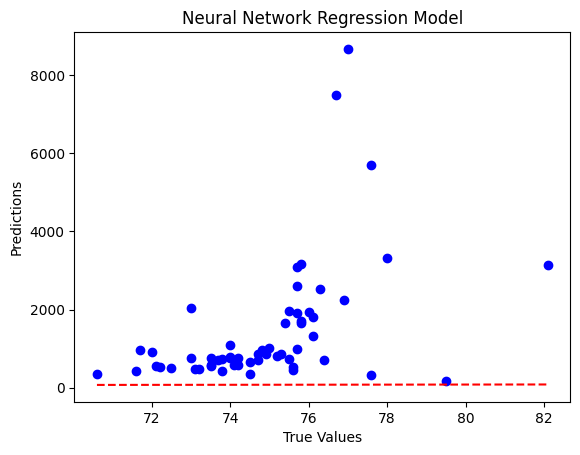

In [117]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test).flatten()

plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Neural Network Regression Model')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Support Vector Machine

In [118]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [119]:
model = SVR(kernel='rbf')

In [120]:
model.fit(X_train, y_train)

SVR()

In [121]:
predictions = model.predict(X_test)

In [122]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.093722122835855


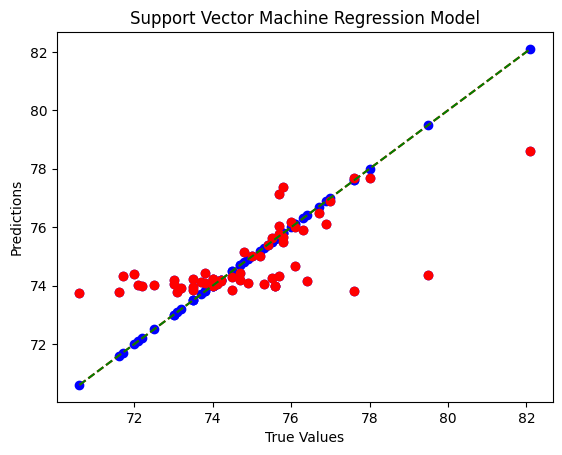

In [123]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)

plt.scatter(y_test, predictions, color='blue')
plt.scatter(y_test, y_test, color='blue', label='True Values')

plt.scatter(y_test, predictions, color='red', label='Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', label='Perfect Predictions')
plt.title('Support Vector Machine Regression Model')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# K-Nearest Neighbors (KNN)



In [124]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [125]:
model = KNeighborsRegressor(n_neighbors=5)

In [126]:
model.fit(X_train, y_train)

KNeighborsRegressor()

In [127]:
predictions = model.predict(X_test)

In [128]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.5762666666666665


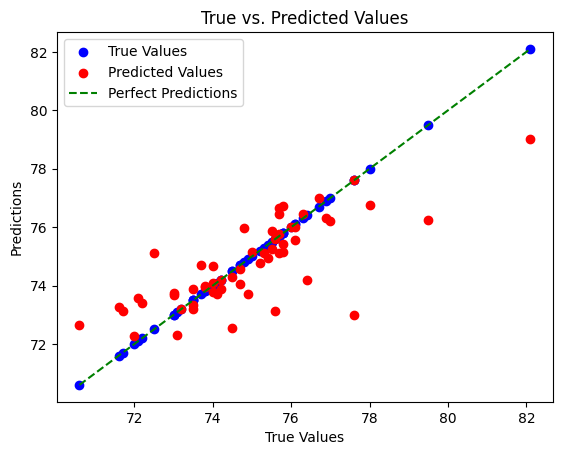

In [129]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)

plt.scatter(y_test, y_test, color='blue', label='True Values')

plt.scatter(y_test, predictions, color='red', label='Predicted Values')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', label='Perfect Predictions')

plt.title('True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

# Gradient Boosting

In [130]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [131]:
model = GradientBoostingRegressor()

In [132]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [133]:
predictions = model.predict(X_test)

In [134]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.4538644351255595


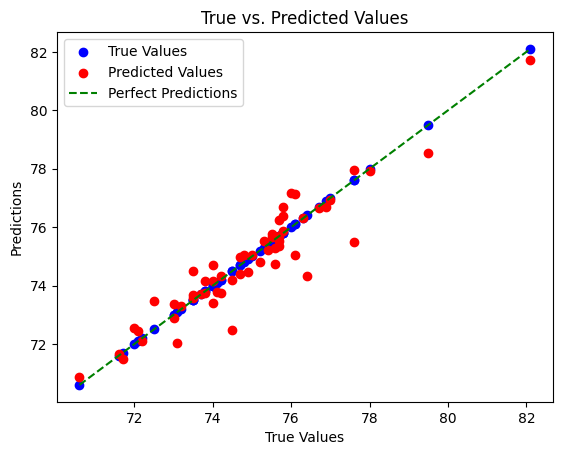

In [135]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)

plt.scatter(y_test, y_test, color='blue', label='True Values')

plt.scatter(y_test, predictions, color='red', label='Predicted Values')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', label='Perfect Predictions')

plt.title('True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

# Random Forest

In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [137]:
model = RandomForestRegressor()

In [138]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [139]:
predictions = model.predict(X_test)

In [140]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5991524561403596


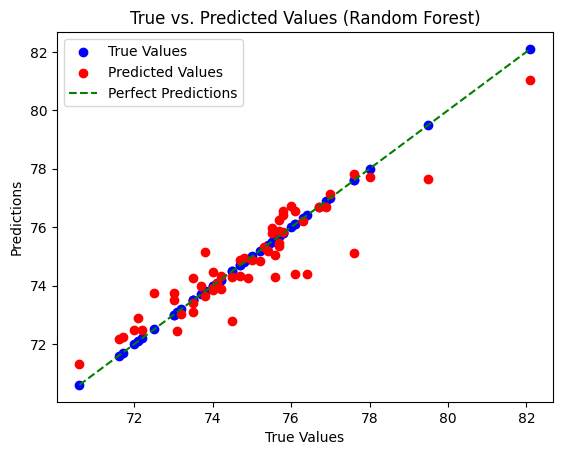

In [141]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)

plt.scatter(y_test, y_test, color='blue', label='True Values')

plt.scatter(y_test, predictions, color='red', label='Predicted Values')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', label='Perfect Predictions')

plt.title('True vs. Predicted Values (Random Forest)')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

# PCA

In [142]:
from sklearn.decomposition import PCA

In [143]:
pca = PCA(n_components=2)

In [144]:
X_pca = pca.fit_transform(X)

In [145]:
print("Transformed Data after PCA:")
print(X_pca)

Transformed Data after PCA:
[[ 9.05068309e+03 -1.55515391e+04]
 [-3.53175372e+04  2.64355699e+03]
 [-8.10954928e+04  1.47747472e+04]
 [-8.35002317e+04  1.09594906e+04]
 [ 9.13743048e+04 -3.67992302e+04]
 [ 5.23728959e+04 -1.97674736e+04]
 [-4.62033282e+04  1.65975572e+03]
 [-8.26009154e+04  9.41006903e+03]
 [-6.38035365e+04  7.64251223e+03]
 [-2.00902964e+04 -8.02273985e+02]
 [-4.13242804e+04 -9.29928693e+03]
 [-7.85518938e+04  1.01596174e+04]
 [-5.79468769e+04  7.02388213e+03]
 [-9.36407425e+04  2.06705227e+04]
 [-5.20263729e+04  4.87868458e+03]
 [-2.27738840e+04 -4.88127166e+03]
 [-8.33712525e+04  1.52869997e+04]
 [-1.83062143e+04 -9.96534920e+03]
 [ 8.87722900e+05  9.51265073e+03]
 [-8.71582882e+04  1.42442583e+04]
 [-7.51766063e+04  7.03779265e+03]
 [-2.48920748e+04 -9.65955594e+03]
 [-4.97266292e+04  6.31824972e+03]
 [-4.61419493e+04 -3.79187119e+03]
 [-7.84469419e+04  1.48890167e+04]
 [-4.19839191e+04 -3.14954580e+03]
 [-3.36293362e+04  2.95354753e+03]
 [-6.04777088e+04  6.402911

# Logistic Regression (attempt)

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [147]:
concatenated_df.head()

,% LBW (Black),% LBW (Hispanic),% LBW (White),% Smokers,Food Environment Index,% Physically Inactive,% Excessive Drinking,# Alcohol-Impaired Driving Deaths,# Driving Deaths,# Chlamydia Cases,...,% Native Hawaiian/Other Pacific Islander,# Hispanic,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,% Female,# Rural,% Rural
0,12.000000,7.675676,9.000000,21,7.5,28,14,18,60,263.0,...,0.1,2188,2.9,68059,89.2,734,1,51.3,26041,34.7
1,14.000000,6.000000,9.000000,21,7.9,33,15,24,47,153.0,...,0.2,5822,12.1,37170,77.2,1463,3,50.9,25053,55.6
2,14.391304,7.675676,8.056604,23,7.4,32,12,11,27,56.0,...,0.0,375,2.3,14851,92.9,36,0,50.9,12937,78.5
3,14.391304,7.675676,8.056604,26,7.8,29,14,4,8,180.0,...,0.0,339,2.3,13058,88.7,260,2,41.2,12876,100.0
4,11.000000,4.000000,8.000000,19,7.7,26,14,34,109,473.0,...,0.1,4285,3.3,118326,91.1,1042,1,51.5,40140,32.6


In [148]:
github_url = 'https://raw.githubusercontent.com/marymorkos/tnhealth/main/2019healthrankingstn.csv'
tnhealth20191 = pd.read_csv(github_url)

In [149]:
github_url = 'https://raw.githubusercontent.com/marymorkos/tnhealth/main/2020healthrankingstn.csv'
tnhealth20201 = pd.read_csv(github_url)

In [150]:
github_url = 'https://raw.githubusercontent.com/marymorkos/tnhealth/main/2021healthrankingstn.csv'
tnhealth20211 = pd.read_csv(github_url)

In [151]:
concatenated1_df = pd.concat([tnhealth20191, tnhealth20201, tnhealth20211], ignore_index=True)

In [152]:
concatenated1_df.dropna(subset=['Life Expectancy', 'County'], inplace=True)

In [153]:
label_encoder = LabelEncoder()
concatenated1_df['County'] = label_encoder.fit_transform(concatenated1_df['County'])

In [154]:
X = concatenated1_df[['County']]
y = concatenated1_df['Life Expectancy']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
##logistic_model = LogisticRegression()
##ogistic_model.fit(X_train, y_train)

In [157]:
concatenated1_df.columns

Index(['FIPS', 'State', 'County',
       'Years of Potential Life Lost Rate: Premature death',
       '95% CI - Low: Premature death', '95% CI - High: Premature death',
       'Z-Score: Premature death', 'YPLL Rate (Black)', 'YPLL Rate (Hispanic)',
       'YPLL Rate (White)',
       ...
       'Average Grade Performance (White): Math scores',
       'Firearm Fatalities Rate: Firearm fatalities', 'Traffic Volume',
       '95% CI - Hig: Severe housing cost burdenh', '% Broadband Access',
       'Numerator: Broadband access', '95% CI - Low: Broadband access',
       '95% CI - High: Broadband access', '% Less Than 18 Years of Age',
       '% 65 and Over'],
      dtype='object', length=613)

In [158]:
variable_data_types = concatenated_df.dtypes
print(variable_data_types)

% LBW (Black)                  float64
% LBW (Hispanic)               float64
% LBW (White)                  float64
% Smokers                        int64
Food Environment Index         float64
                                ...   
# Not Proficient in English      int64
% Not Proficient in English      int64
% Female                       float64
# Rural                          int64
% Rural                        float64
Length: 116, dtype: object


In [159]:
numerical_columns = concatenated_df.select_dtypes(include=['int', 'float']).columns
categorical_columns = concatenated_df.select_dtypes(include=['object']).columns

print("Numerical Columns:")
print(numerical_columns)

print("Categorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['% LBW (Black)', '% LBW (Hispanic)', '% LBW (White)', '% Smokers',
       'Food Environment Index', '% Physically Inactive',
       '% Excessive Drinking', '# Alcohol-Impaired Driving Deaths',
       '# Driving Deaths', '# Chlamydia Cases',
       ...
       '% Native Hawaiian/Other Pacific Islander', '# Hispanic', '% Hispanic',
       '# Non-Hispanic White', '% Non-Hispanic White',
       '# Not Proficient in English', '% Not Proficient in English',
       '% Female', '# Rural', '% Rural'],
      dtype='object', length=116)
Categorical Columns:
Index([], dtype='object')


# Bootstrap

In [160]:
import pandas as pd
import numpy as np

In [161]:
life_expectancy_column = 'Life Expectancy'

In [162]:
num_bootstrap_samples = 1000

In [163]:
bootstrap_estimates = []
for _ in range(num_bootstrap_samples):
    bootstrap_sample = concatenated_df.sample(n=len(concatenated_df), replace=True)

In [164]:
statistic_value = bootstrap_sample[life_expectancy_column].mean()

In [165]:
bootstrap_estimates.append(statistic_value)

In [166]:
confidence_interval = np.percentile(bootstrap_estimates, [2.5, 97.5])

In [167]:
print("Bootstrap Estimate of", life_expectancy_column + ":", np.mean(bootstrap_estimates))
print("95% Confidence Interval:", confidence_interval)

Bootstrap Estimate of Life Expectancy: 75.06771929824562
95% Confidence Interval: [75.0677193 75.0677193]


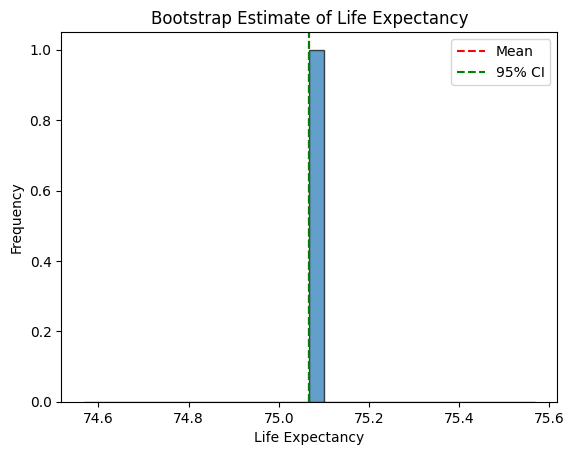

In [168]:
import matplotlib.pyplot as plt

plt.hist(bootstrap_estimates, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(np.mean(bootstrap_estimates), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=1.5, label='95% CI')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=1.5)
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Bootstrap Estimate of Life Expectancy')
plt.legend()
plt.show()

# Map and Misc

In [169]:
concatenated1_df.head()

,FIPS,State,County,Years of Potential Life Lost Rate: Premature death,95% CI - Low: Premature death,95% CI - High: Premature death,Z-Score: Premature death,YPLL Rate (Black),YPLL Rate (Hispanic),YPLL Rate (White),...,Average Grade Performance (White): Math scores,Firearm Fatalities Rate: Firearm fatalities,Traffic Volume,95% CI - Hig: Severe housing cost burdenh,% Broadband Access,Numerator: Broadband access,95% CI - Low: Broadband access,95% CI - High: Broadband access,% Less Than 18 Years of Age,% 65 and Over
0,47001,Tennessee,0,9536.0,8703,10368,-0.40,11586.0,NaN,9749.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47003,Tennessee,1,9762.0,8769,10754,-0.28,9265.0,4454.0,10683.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,47005,Tennessee,2,12828.0,10692,14965,1.40,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47007,Tennessee,3,7735.0,6103,9367,-1.39,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47009,Tennessee,4,8268.0,7676,8860,-1.09,8794.0,NaN,8458.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
numeric1_df = concatenated1_df.select_dtypes(include='number')

# Display the DataFrame with only numeric columns
print(numeric1_df)

      FIPS  County  Years of Potential Life Lost Rate: Premature death  \
0    47001       0                                             9536.0    
1    47003       1                                             9762.0    
2    47005       2                                            12828.0    
3    47007       3                                             7735.0    
4    47009       4                                             8268.0    
..     ...     ...                                                ...    
280  47181      90                                                NaN    
281  47183      91                                                NaN    
282  47185      92                                                NaN    
283  47187      93                                                NaN    
284  47189      94                                                NaN    

     95% CI - Low: Premature death  95% CI - High: Premature death  \
0                             8703       

In [171]:
integer_df = concatenated1_df.select_dtypes(include='integer')

# Display the DataFrame with only integer columns
print(integer_df)

      FIPS  County  95% CI - Low: Premature death  \
0    47001       0                           8703   
1    47003       1                           8769   
2    47005       2                          10692   
3    47007       3                           6103   
4    47009       4                           7676   
..     ...     ...                            ...   
280  47181      90                           8224   
281  47183      91                           7879   
282  47185      92                           8471   
283  47187      93                           3956   
284  47189      94                           6751   

     95% CI - High: Premature death  95% CI - Low: Poor or fair health  \
0                             10368                                 18   
1                             10754                                 21   
2                             14965                                 20   
3                              9367                                

In [172]:
numeric_df = concatenated1_df.select_dtypes(include='number')

nan_mean = numeric_df.loc[:, numeric_df.isna().any()].mean()

print(nan_mean)

Years of Potential Life Lost Rate: Premature death    10307.210526
YPLL Rate (Black)                                     11805.645570
YPLL Rate (Hispanic)                                   4493.666667
YPLL Rate (White)                                      9386.237500
% Fair/Poor                                              20.442105
                                                          ...     
Numerator: Broadband access                           21424.515789
95% CI - Low: Broadband access                           69.052632
95% CI - High: Broadband access                          75.410526
% Less Than 18 Years of Age                              21.028421
% 65 and Over                                            19.521053
Length: 451, dtype: float64


In [173]:
numeric1_df.head()

,FIPS,County,Years of Potential Life Lost Rate: Premature death,95% CI - Low: Premature death,95% CI - High: Premature death,Z-Score: Premature death,YPLL Rate (Black),YPLL Rate (Hispanic),YPLL Rate (White),% Fair/Poor,...,Average Grade Performance (White): Math scores,Firearm Fatalities Rate: Firearm fatalities,Traffic Volume,95% CI - Hig: Severe housing cost burdenh,% Broadband Access,Numerator: Broadband access,95% CI - Low: Broadband access,95% CI - High: Broadband access,% Less Than 18 Years of Age,% 65 and Over
0,47001,0,9536.0,8703,10368,-0.40,11586.0,NaN,9749.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47003,1,9762.0,8769,10754,-0.28,9265.0,4454.0,10683.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,47005,2,12828.0,10692,14965,1.40,NaN,NaN,NaN,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47007,3,7735.0,6103,9367,-1.39,NaN,NaN,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47009,4,8268.0,7676,8860,-1.09,8794.0,NaN,8458.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
pip install folium

In [175]:
# Define the models and their corresponding MSE values
models_mse = {
    "Linear Regression": 0.9537812205407389,
    "Gradient Boosting": 0.44564624263030017,
    "Random Forest": 0.5509994912280721
}

# Print the models and their MSE values
print("Model MSE values:")
for model, mse in models_mse.items():
    print(f"{model}: {mse}")

# Additional information
print("\nPermutation Test Results for Geographic_Group:")
print("Group Rural/Low Homeownership Mean Life Expectancy: 74.88867924528302")
print("Group Urban/High Homeownership Mean Life Expectancy: 75.17999999999999")
print("Observed Test Statistic: -0.2913207547169776")
print("P-value: 0.488")
print("Bootstrap Estimate of Life Expectancy: 74.85333333333332")
print("95% Confidence Interval: [74.85333333 74.85333333]")


Model MSE values:
Linear Regression: 0.9537812205407389
Gradient Boosting: 0.44564624263030017
Random Forest: 0.5509994912280721

Permutation Test Results for Geographic_Group:
Group Rural/Low Homeownership Mean Life Expectancy: 74.88867924528302
Group Urban/High Homeownership Mean Life Expectancy: 75.17999999999999
Observed Test Statistic: -0.2913207547169776
P-value: 0.488
Bootstrap Estimate of Life Expectancy: 74.85333333333332
95% Confidence Interval: [74.85333333 74.85333333]


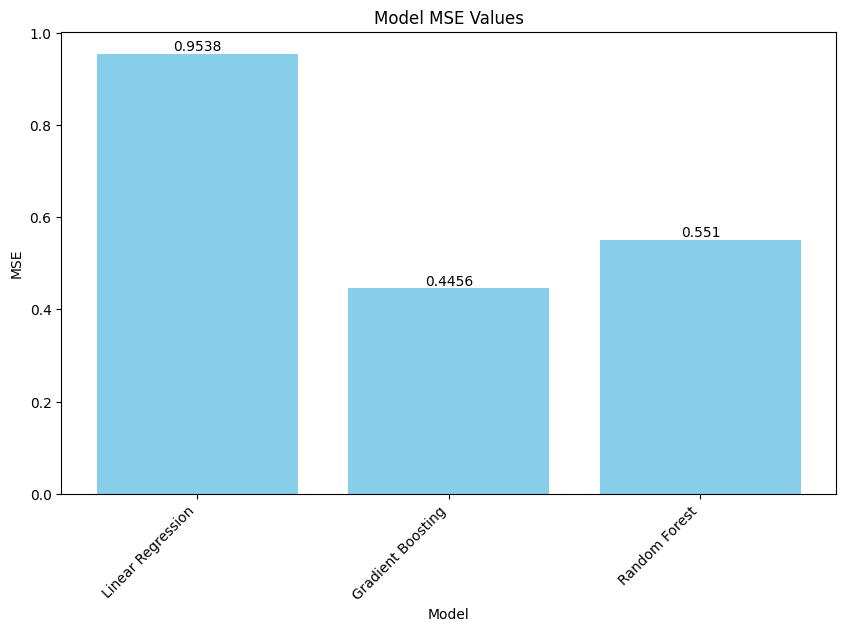

In [176]:
import matplotlib.pyplot as plt

models_mse = {
    "Linear Regression": 0.9537812205407389,
    "Gradient Boosting": 0.44564624263030017,
    "Random Forest": 0.5509994912280721
}

plt.figure(figsize=(10, 6))
bars = plt.bar(models_mse.keys(), models_mse.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Model MSE Values')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 4),
             ha='center', va='bottom')

plt.savefig('model_mse_plot.png', bbox_inches='tight')

additional_info = [
    "Permutation Test Results for Geographic_Group:",
    "Group Rural/Low Homeownership Mean Life Expectancy: 74.88867924528302",
    "Group Urban/High Homeownership Mean Life Expectancy: 75.17999999999999",
    "Observed Test Statistic: -0.2913207547169776",
    "P-value: 0.488",
    "Bootstrap Estimate of Life Expectancy: 74.85333333333332",
    "95% Confidence Interval: [74.85333333 74.85333333]"
]

with open('additional_info.txt', 'w') as f:
    for item in additional_info:
        f.write("%s\n" % item)


In [177]:
github_url = 'https://raw.githubusercontent.com/marymorkos/tnhealth/main/2019healthrankingstn.csv'
tnhealth20192 = pd.read_csv(github_url)

In [178]:
github_url = 'https://raw.githubusercontent.com/marymorkos/tnhealth/main/2020healthrankingstn.csv'
tnhealth20202 = pd.read_csv(github_url)

In [179]:
github_url = 'https://raw.githubusercontent.com/marymorkos/tnhealth/main/2021healthrankingstn.csv'
tnhealth20212 = pd.read_csv(github_url)

In [180]:
tnhealth20192= tnhealth20192.rename(columns={'Longtitude': 'Longitude'})
tnhealth20202= tnhealth20202.rename(columns={'Longtitude': 'Longitude'})
tnhealth20212= tnhealth20212.rename(columns={'Longtitude': 'Longitude'})

In [181]:
concatenated_df2 = pd.concat([tnhealth20192, tnhealth20202, tnhealth20212], ignore_index=True)

In [182]:
tnhealth20192.head()

,FIPS,State,County,Years of Potential Life Lost Rate: Premature death,95% CI - Low: Premature death,95% CI - High: Premature death,Z-Score: Premature death,YPLL Rate (Black),YPLL Rate (Hispanic),YPLL Rate (White),...,# Not Proficient in English,% Not Proficient in English,95% CI - Low: Demographics,95% CI - High: Demographics,% Female,# Rural,% Rural,Latitude,Longitude,Year
0,47001,Tennessee,Anderson,9536,8703,10368,-0.40,11586.0,NaN,9749.0,...,734,1,1,1,51.3,26041,34.7,36.1185,-84.1985,2019
1,47003,Tennessee,Bedford,9762,8769,10754,-0.28,9265.0,4454.0,10683.0,...,1463,3,2,4,50.9,25053,55.6,35.5138,-86.4589,2019
2,47005,Tennessee,Benton,12828,10692,14965,1.40,NaN,NaN,NaN,...,36,0,0,1,50.9,12937,78.5,36.0698,-88.0683,2019
3,47007,Tennessee,Bledsoe,7735,6103,9367,-1.39,NaN,NaN,NaN,...,260,2,0,4,41.2,12876,100.0,35.5964,-85.2051,2019
4,47009,Tennessee,Blount,8268,7676,8860,-1.09,8794.0,NaN,8458.0,...,1042,1,1,1,51.5,40140,32.6,35.6872,-83.9255,2019


In [183]:
!pip install folium
import folium

In [184]:
from folium.plugins import HeatMap

concatenated_df = pd.concat([tnhealth20192, tnhealth20202, tnhealth20212], ignore_index=True)

county_life_expectancy = concatenated_df.groupby('County')['Life Expectancy'].mean()

latitude = concatenated_df['Latitude']
longitude = concatenated_df['Longitude']
county_name = concatenated_df['County']
life_expectancy = concatenated_df['County'].map(county_life_expectancy)

map_center = [latitude.mean(), longitude.mean()]
mymap = folium.Map(location=map_center, zoom_start=7)

heat_data = [[lat, lon, life] for lat, lon, life in zip(latitude, longitude, life_expectancy)]
heatmap = HeatMap(heat_data, radius=15, blur=20, gradient={0.4: 'blue', 0.65: 'green', 1: 'red'})
mymap.add_child(heatmap)

for lat, lon, county, life in zip(latitude, longitude, county_name, life_expectancy):
    color = 'blue' if life <= 0.4 else 'green' if life <= 0.65 else 'red'
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        tooltip=f"{county}<br>Average Life Expectancy: {life:.2f}",
    ).add_to(mymap)

mymap

# Correlation Matrix

In [185]:
github_url = 'https://raw.githubusercontent.com/marymorkos/tnhealth/main/2019healthrankingstn.csv'
tnhealth2019 = pd.read_csv(github_url)

In [186]:
github_url = 'https://raw.githubusercontent.com/marymorkos/tnhealth/main/2020healthrankingstn.csv'
tnhealth2020 = pd.read_csv(github_url)

In [187]:
github_url = 'https://raw.githubusercontent.com/marymorkos/tnhealth/main/2021healthrankingstn.csv'
tnhealth2021 = pd.read_csv(github_url)

In [188]:
concatenated_df = pd.concat([tnhealth2019, tnhealth2020, tnhealth2021], ignore_index=True)

In [189]:
concatenated_df = pd.concat([tnhealth2019, tnhealth2020, tnhealth2021], ignore_index=True)

common_columns = set.intersection(*(set(df.columns) for df in [tnhealth2019, tnhealth2020, tnhealth2021]))
concatenated_df = concatenated_df[list(common_columns)]

In [190]:
categorical_columns = concatenated_df.select_dtypes(include='object').columns
concatenated_df[categorical_columns] = concatenated_df[categorical_columns].fillna(concatenated_df[categorical_columns].mode().iloc[0])

columns_to_drop = [col for col in concatenated_df.columns if 'Z-Score' in col or 'CI' in col]
concatenated_df = concatenated_df.drop(columns=columns_to_drop)

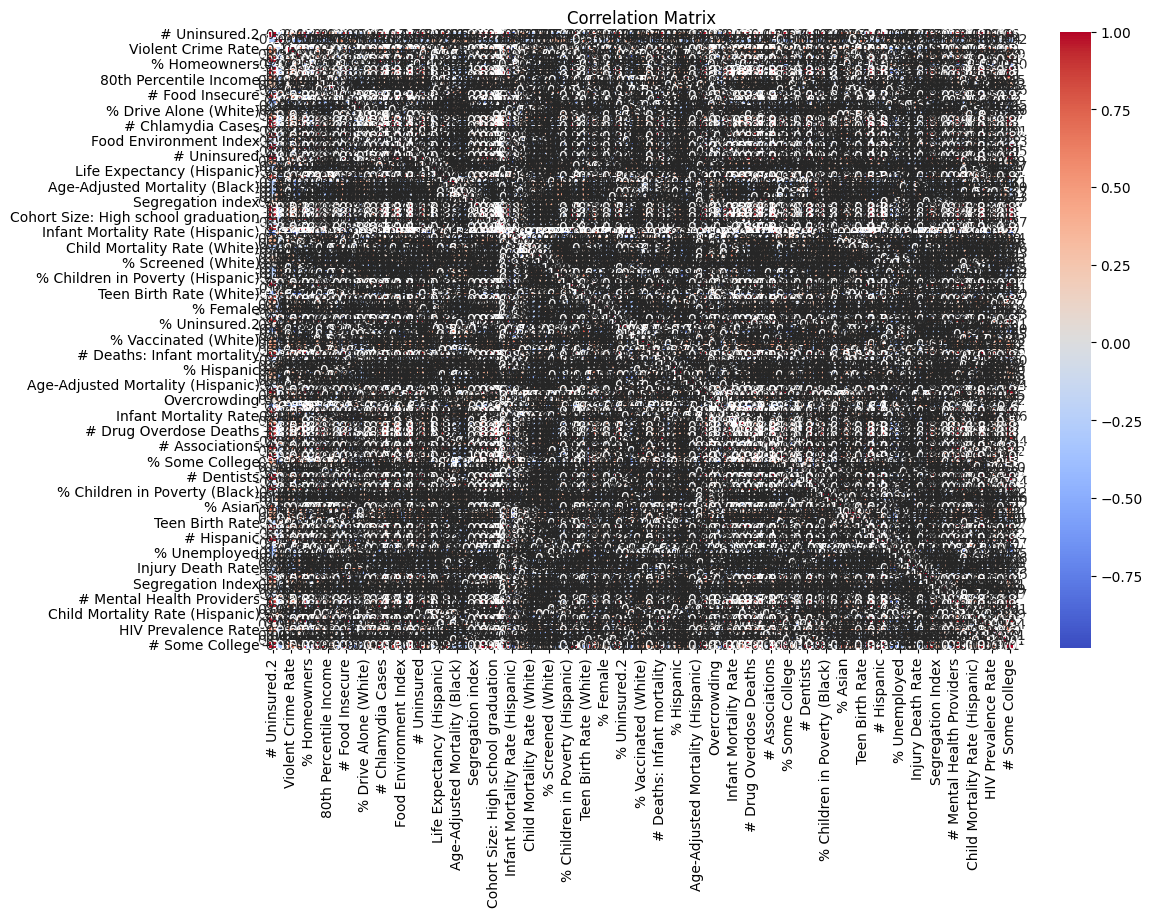

In [191]:
numeric_df = concatenated_df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

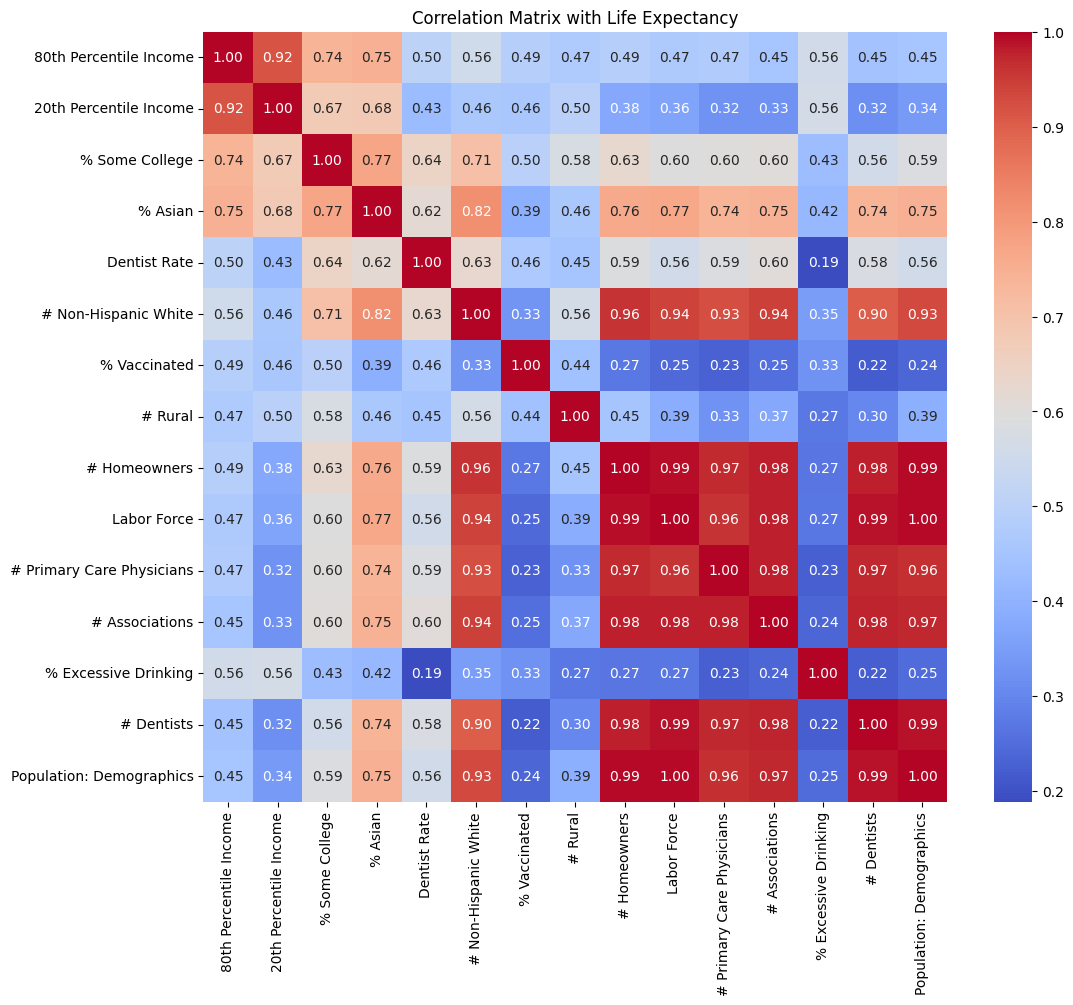

In [192]:
selected_columns = [
    '80th Percentile Income',
    '20th Percentile Income',
    '% Some College',
    '% Asian',
    'Dentist Rate',
    '# Non-Hispanic White',
    '% Vaccinated',
    '# Rural',
    '# Homeowners',
    'Labor Force',
    '# Primary Care Physicians',
    '# Associations',
    '% Excessive Drinking',
    '# Dentists',
    'Population: Demographics'
]

selected_df = concatenated_df[selected_columns]

correlation_matrix = selected_df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix with Life Expectancy')

plt.show()

# 3D Plot

In [193]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

In [194]:
combined_df = pd.concat([tnhealth2019, tnhealth2020, tnhealth2021])

hover_text = (
    'County: ' + combined_df['County'] + '<br>' +
    'Life Expectancy: ' + combined_df['Life Expectancy'].astype(str) + '<br>' +
    '80th Percentile Income: ' + combined_df['80th Percentile Income'].astype(str) + '<br>' +
    '20th Percentile Income: ' + combined_df['20th Percentile Income'].astype(str) + '<br>' +
    '% Some College: ' + combined_df['% Some College'].astype(str) + '<br>' +
    '% Asian: ' + combined_df['% Asian'].astype(str) + '<br>' +
    '# Non-Hispanic White: ' + combined_df['# Non-Hispanic White'].astype(str) + '<br>' +
    '% Vaccinated: ' + combined_df['% Vaccinated'].astype(str) + '<br>' +
    '# Rural: ' + combined_df['# Rural'].astype(str) + '<br>' +
    '# Homeowners: ' + combined_df['# Homeowners'].astype(str) + '<br>' +
    'Labor Force: ' + combined_df['Labor Force'].astype(str) + '<br>' +
    '# Associations: ' + combined_df['# Associations'].astype(str)
)

scatter = go.Scatter3d(
    x=combined_df['% Vaccinated'],
    y=combined_df['# Associations'],
    z=combined_df['% Some College'],
    mode='markers',
    marker=dict(
        size=5,
        color=combined_df['Life Expectancy'],
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(
            title='Life Expectancy',  # Colorbar title
            tickfont=dict(size=10)  # Font size of the colorbar tick labels
        )
    ),
    hoverinfo='text',
    text=hover_text,
    name='Data'
)

fig = go.Figure(data=[scatter])

fig.update_layout(
    title='Interactive 3D Scatter Plot',
    scene=dict(
        xaxis=dict(title='% Vaccinated'),
        yaxis=dict(title='# Associations'),
        zaxis=dict(title='% Some College')
    )
)

fig.show()
fig.write_html('3d_plot.html')

In [195]:
fig.write_html('3d_plot.html')

# Feature Selection

In [196]:
import pandas as pd

In [197]:
github_url = 'https://raw.githubusercontent.com/marymorkos/tnhealth/main/2019healthrankingstn.csv'
tnhealth2019 = pd.read_csv(github_url)

In [198]:
github_url = 'https://raw.githubusercontent.com/marymorkos/tnhealth/main/2020healthrankingstn.csv'
tnhealth2020 = pd.read_csv(github_url)

In [199]:
github_url = 'https://raw.githubusercontent.com/marymorkos/tnhealth/main/2021healthrankingstn.csv'
tnhealth2021 = pd.read_csv(github_url)

In [200]:
tnhealth2019= tnhealth2019.rename(columns={'Longtitude': 'Longitude'})
tnhealth2020= tnhealth2020.rename(columns={'Longtitude': 'Longitude'})
tnhealth2021= tnhealth2021.rename(columns={'Longtitude': 'Longitude'})

In [201]:
common_columns = set(concatenated_df.columns)
for df in [tnhealth2019, tnhealth2020, tnhealth2021]:
    common_columns = common_columns.intersection(df.columns)

In [202]:
for df in [tnhealth2019, tnhealth2020, tnhealth2021]:
    non_common_columns = set(df.columns) - common_columns
    df.drop(columns=non_common_columns, inplace=True)
    numeric_columns = df.select_dtypes(include=['number']).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [203]:
for df in [tnhealth2019, tnhealth2020, tnhealth2021]:
    nan_columns = df.columns[df.isna().any()].tolist()
    df.drop(columns=nan_columns, inplace=True)

In [204]:
keywords_to_drop = ['CI', 'Z-Score']

columns_to_drop = [col for col in df.columns if any(keyword in col for keyword in keywords_to_drop)]
df.drop(columns=columns_to_drop, inplace=True)

In [205]:
df.head()

,FIPS,State,County,% LBW (Black),% LBW (Hispanic),% LBW (White),% Smokers,Food Environment Index,% Physically Inactive,% Excessive Drinking,...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,% Female,# Rural,% Rural,Latitude,Year
0,47001,Tennessee,Anderson,12.000000,5.000000,9.000000,24,7.2,28,15,...,3.2,68400,88.9,560,1,51.3,26041,34.7,36.1185,2021
1,47003,Tennessee,Bedford,14.000000,6.000000,9.000000,26,7.7,32,16,...,13.1,37842,76.1,1433,3,50.7,25053,55.6,35.5138,2021
2,47005,Tennessee,Benton,14.553191,7.785714,7.964286,30,6.8,26,15,...,2.7,14910,92.3,19,0,51.1,12937,78.5,36.0698,2021
3,47007,Tennessee,Bledsoe,14.553191,7.785714,7.964286,28,7.2,31,16,...,2.8,13151,87.3,220,2,40.5,12876,100.0,35.5964,2021
4,47009,Tennessee,Blount,13.000000,6.000000,8.000000,22,7.6,25,17,...,3.6,120594,90.6,773,1,51.4,40140,32.6,35.6872,2021


In [206]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

In [207]:
numeric_columns = df.select_dtypes(include=['number']).columns

In [208]:
target_column = 'Life Expectancy'
X = df[numeric_columns].drop(columns=[target_column])  # Features
y = df[target_column]

In [209]:
k = 5  # Number of features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

In [210]:
selected_indices = selector.get_support(indices=True)

In [211]:
selected_features = X.columns[selected_indices]

In [212]:
print("Selected Features:", selected_features)

Selected Features: Index(['% Smokers', '80th Percentile Income', '% Frequent Physical Distress',
       '% Frequent Mental Distress', '% Food Insecure'],
      dtype='object')


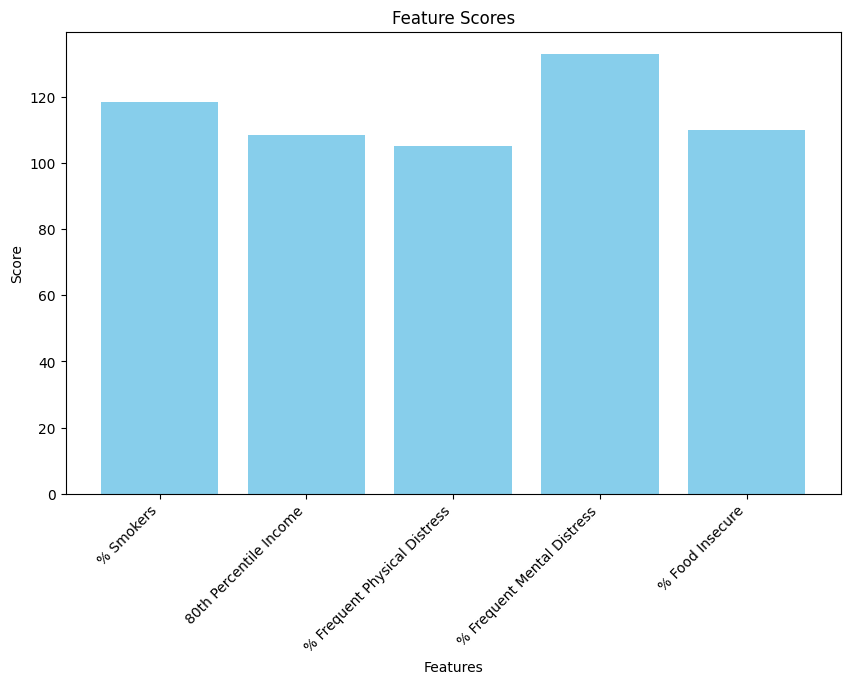

In [213]:
import matplotlib.pyplot as plt

feature_scores = selector.scores_[selected_indices]

plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_scores, color='skyblue')
plt.title('Feature Scores')
plt.xlabel('Features')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.show()